**Reading Data of LT FS ID: Intrusion Detection using WSN**

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
print(data.shape)
x = data.drop("Number of Barriers",axis=1)
y = data["Number of Barriers"]
data

(182, 5)


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [5]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB
None


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


**Checking is there any missing values**

In [4]:
data.isnull().sum()

Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64

**Show the counts of observations**

Area
5000     26
9375     26
15000    26
21875    26
30000    26
39375    26
50000    26
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


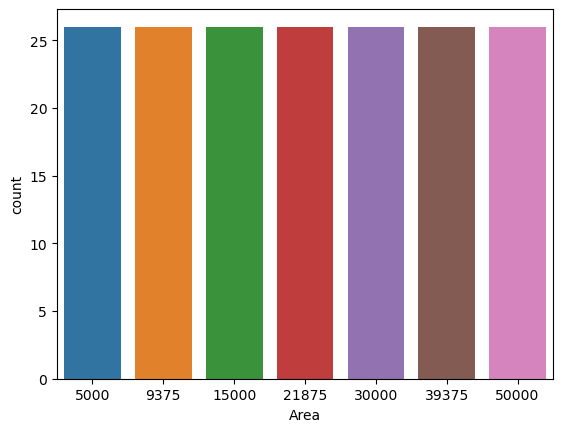

In [5]:
import seaborn as sns
print(data.Area.value_counts())
print(sns.countplot(x=data.Area))

/home/mridul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


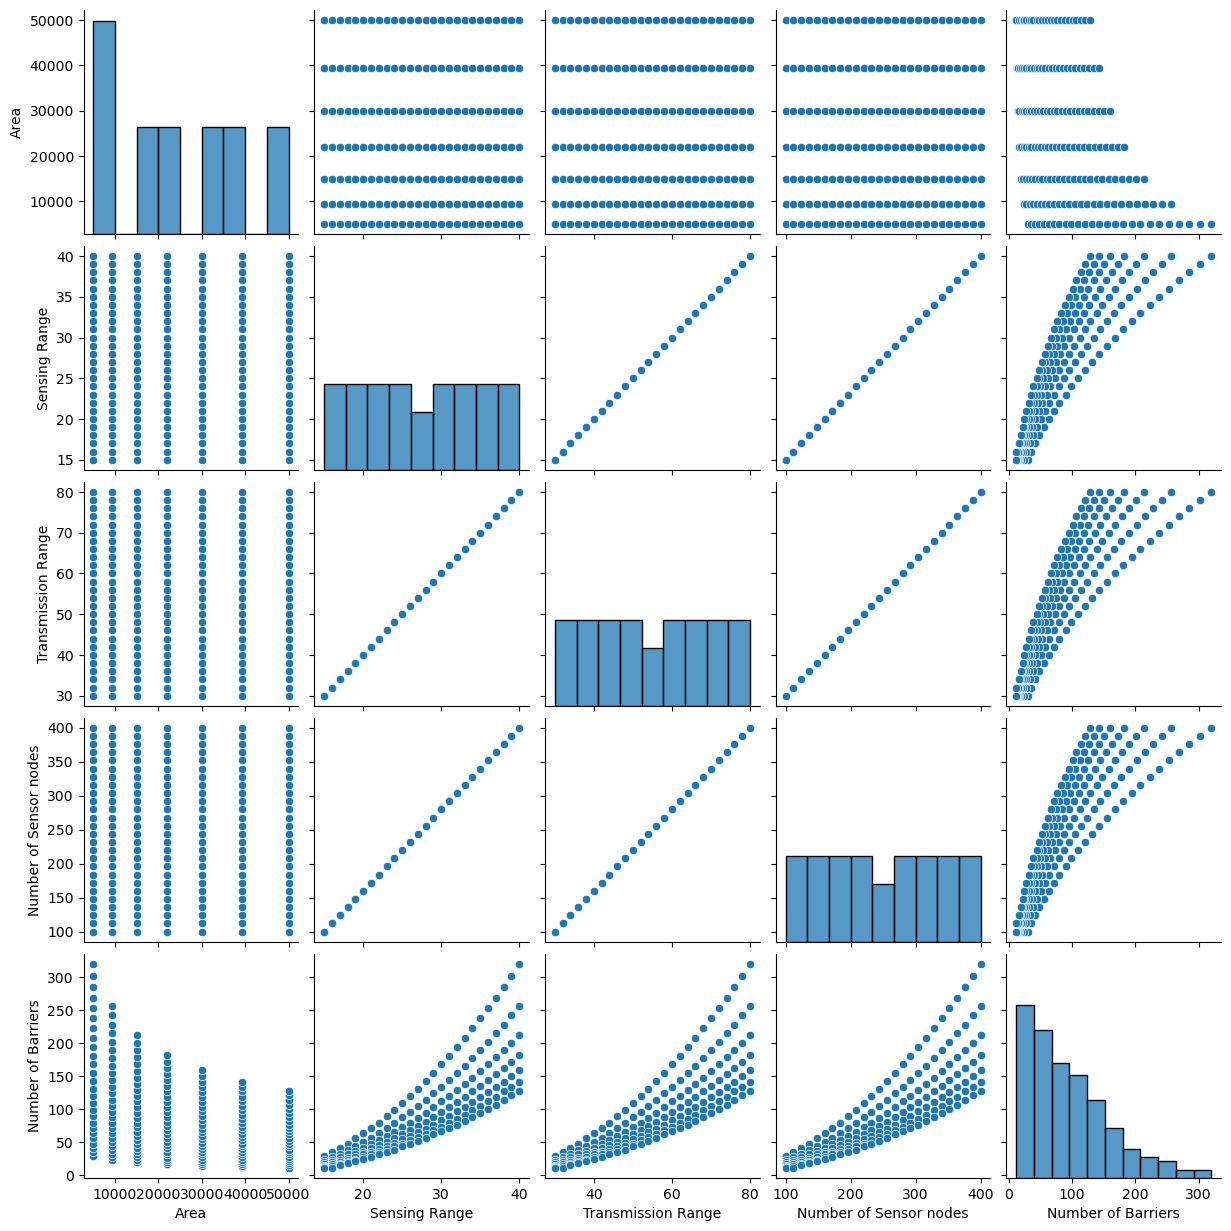

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

**We will not use label encoder as all values are numerical**

**train and test splitting**

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

**First Algorithm - LinearRegression as associated task is Regression**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
lr=LinearRegression()
lr.fit(xtrain,ytrain)        # increase the chances of useable data

pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print("R2-Score of training:",r2_score(ytrain,pred_train))
print("MSE of training:", mean_squared_error(ytrain, pred_train))
print("RMSE of training:", root_mean_squared_error(ytrain, pred_train))
print("R2-Score of testing:",r2_score(ytest,pred_test))
print("MSE of testing:", mean_squared_error(ytest, pred_test))
print("RMSE of testing:", root_mean_squared_error(ytest, pred_test))

R2-Score of training: 0.8881935577909834
MSE of training: 437.95275257178145
RMSE of training: 20.92732072129114
R2-Score of testing: 0.8624495536887031
MSE of testing: 746.3810746753909
RMSE of testing: 27.319975744414396


**Second Algorithm - Decision Tree Regression** is a type of regression algorithm that builds a decision tree to predict the target value.

R2-Score of training: 1.0
MSE of training: 0.0
RMSE of training: 0.0
R2-Score of testing: 0.9831847976096437
MSE of testing: 91.24324324324324
RMSE of testing: 9.552132915911674
[Text(0.4405420353982301, 0.95, 'x[2] <= 51.0\npoisson = 19.988\nsamples = 145\nvalue = 94.186'), Text(0.2255254424778761, 0.85, 'x[1] <= 22.5\npoisson = 4.768\nsamples = 60\nvalue = 40.8'), Text(0.1230641592920354, 0.75, 'x[1] <= 17.5\npoisson = 2.27\nsamples = 42\nvalue = 31.786'), Text(0.05641592920353982, 0.65, 'x[0] <= 18437.5\npoisson = 1.338\nsamples = 18\nvalue = 23.111'), Text(0.024336283185840708, 0.55, 'x[0] <= 7187.5\npoisson = 0.54\nsamples = 8\nvalue = 30.375'), Text(0.01327433628318584, 0.45, 'x[1] <= 16.5\npoisson = 0.338\nsamples = 3\nvalue = 35.667'), Text(0.008849557522123894, 0.35, 'x[2] <= 31.0\npoisson = 0.096\nsamples = 2\nvalue = 32.5'), Text(0.004424778761061947, 0.25, 'poisson = 0.0\nsamples = 1\nvalue = 30.0'), Text(0.01327433628318584, 0.25, 'poisson = 0.0\nsamples = 1\nvalue = 35.0'

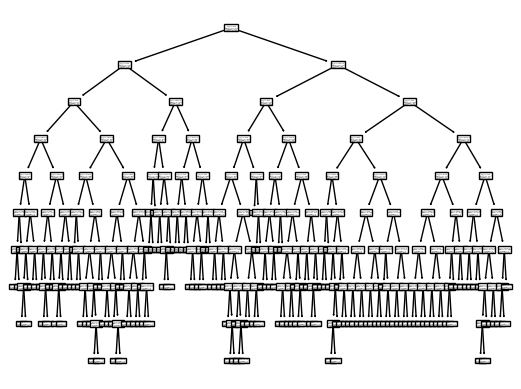

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dt=DecisionTreeRegressor(criterion='poisson',splitter="best")
dt.fit(xtrain,ytrain)


pred_train1=dt.predict(xtrain)
pred_test1=dt.predict(xtest)
print("R2-Score of training:",r2_score(ytrain,pred_train1))
print("MSE of training:", mean_squared_error(ytrain, pred_train1))
print("RMSE of training:", root_mean_squared_error(ytrain, pred_train1))
print("R2-Score of testing:",r2_score(ytest,pred_test1))
print("MSE of testing:", mean_squared_error(ytest, pred_test1))
print("RMSE of testing:", root_mean_squared_error(ytest, pred_test1))
print(tree.plot_tree(dt))


**Third Algorithm - Support vector regression** works by finding a hyperplane that minimizes the sum of the squared residuals between the predicted and actual values.

In [10]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=9990)
svr.fit(xtrain,ytrain)

pred_train2=svr.predict(xtrain)
pred_test2=svr.predict(xtest)
print("R2-Score of training:",r2_score(ytrain,pred_train2))
print("MSE of training:", mean_squared_error(ytrain, pred_train2))
print("RMSE of training:", root_mean_squared_error(ytrain, pred_train2))
print("R2-Score of testing:",r2_score(ytest,pred_test2))
print("MSE of testing:", mean_squared_error(ytest, pred_test2))
print("RMSE of testing:", root_mean_squared_error(ytest, pred_test2))


R2-Score of training: 0.6055903885166363
MSE of training: 1544.926853740599
RMSE of training: 39.30555754267581
R2-Score of testing: 0.6167617973944685
MSE of testing: 2079.5406280981974
RMSE of testing: 45.601980528242386


**Fourth Algorithm - Ridge** is a type of linear regression that is used to prevent overfitting. Overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

In [11]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.5, tol = 0.001, solver ='auto', random_state = 42)
model.fit(xtrain,ytrain)

pred_train3=model.predict(xtrain)
pred_test3=model.predict(xtest)
print("R2-Score of training:",r2_score(ytrain,pred_train3))
print("MSE of training:", mean_squared_error(ytrain, pred_train3))
print("RMSE of training:", root_mean_squared_error(ytrain, pred_train3))
print("R2-Score of testing:",r2_score(ytest,pred_test3))
print("MSE of testing:", mean_squared_error(ytest, pred_test3))
print("RMSE of testing:", root_mean_squared_error(ytest, pred_test3))

R2-Score of training: 0.888193557790858
MSE of training: 437.95275257227286
RMSE of training: 20.92732072130288
R2-Score of testing: 0.8624495320628698
MSE of testing: 746.3811920222487
RMSE of testing: 27.31997789205271


**Fifth - RandomForestRegression** is an ensemble method that combines multiple decision trees to predict the target value. Ensemble methods are a type of machine learning algorithm that combines multiple models to improve the performance of the overall model.

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
regressor.fit(xtrain,ytrain)

pred_train4=regressor.predict(xtrain)
pred_test4=regressor.predict(xtest)
print("R2-Score of training:",r2_score(ytrain,pred_train4))
print("MSE of training:", mean_squared_error(ytrain, pred_train4))
print("RMSE of training:", root_mean_squared_error(ytrain, pred_train4))
print("R2-Score of testing:",r2_score(ytest,pred_test4))
print("MSE of testing:", mean_squared_error(ytest, pred_test4))
print("RMSE of testing:", root_mean_squared_error(ytest, pred_test4))

R2-Score of training: 0.9964718981901867
MSE of training: 13.819793103448266
RMSE of training: 3.7174982318016325
R2-Score of testing: 0.9850221672807866
MSE of testing: 81.27324324324323
RMSE of testing: 9.015167399623992


/home/mridul/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


**Hyperparameter tuning** Grid search

In [13]:
from sklearn.model_selection import GridSearchCV                            # SVR
parameters= {}
clf=GridSearchCV(svr, param_grid=parameters)
train_model=clf.fit(xtrain,ytrain)

print("SVR score:",svr.score(xtest,ytest))
print("Best score",clf.best_score_)

SVR score: 0.6167617973944685
Best score 0.44011515773790394


In [14]:
parameters= {}                                                                         #linear regression
grid = GridSearchCV(estimator=lr, param_grid = parameters)

train_model1=grid.fit(xtrain,ytrain)
print("Linear regression score:",lr.score(xtest,ytest))
print("Best score: ",clf.best_score_)

Linear regression score: 0.8624495536887031
Best score:  0.44011515773790394


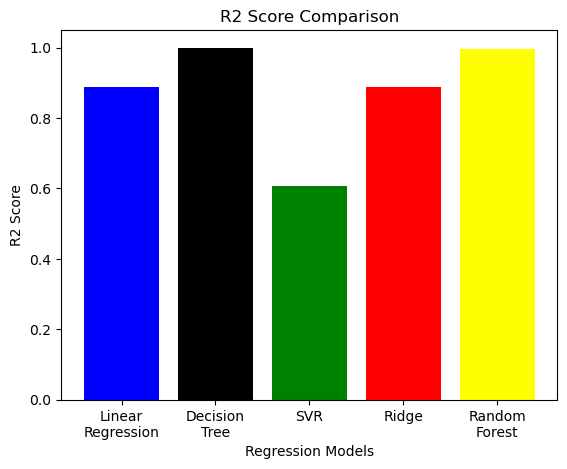

In [21]:
import matplotlib.pyplot as plt

mse_v=[r2_score(ytrain,pred_train),r2_score(ytrain,pred_train1),r2_score(ytrain,pred_train2),r2_score(ytrain,pred_train3), r2_score(ytrain,pred_train4)]
mo=['Linear\nRegression','Decision\nTree','SVR','Ridge', 'Random\nForest']

plt.bar(mo, mse_v, color=['blue','black','green', 'red', 'yellow'])

plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')

plt.show()